In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('rahul.csv')

In [3]:
any(df['Request id'].duplicated())
sum(df['Request id'].duplicated())
#checking for duplicates

0

In [4]:
df['Request id'].isna().sum()
#checking null values

0

In [5]:
df['Pickup point'].isna().sum()

0

In [6]:
df['Status'].isna().sum()

0

In [7]:
df['Request timestamp'].isna().sum()


0

In [8]:
df['Request date']=pd.to_datetime(df['Request timestamp'],infer_datetime_format=True)
df=df.drop('Request timestamp',axis=1)
df.info()
#coverting irregularly arranged date column to datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id        6745 non-null int64
Pickup point      6745 non-null object
Driver id         4095 non-null float64
Status            6745 non-null object
Drop timestamp    2831 non-null object
Request date      6745 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.2+ KB


In [9]:
df['Drop date']=pd.to_datetime(df['Drop timestamp'],infer_datetime_format=True)
df=df.drop('Drop timestamp',axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id      6745 non-null int64
Pickup point    6745 non-null object
Driver id       4095 non-null float64
Status          6745 non-null object
Request date    6745 non-null datetime64[ns]
Drop date       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


,Request id,Pickup point,Driver id,Status,Request date,Drop date
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [10]:
df['day'] = df['Request date'].dt.day
df['reqhour'] = df['Request date'].dt.hour
df.head()
#extracting day and hour from from date timestamp

,Request id,Pickup point,Driver id,Status,Request date,Drop date,day,reqhour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8


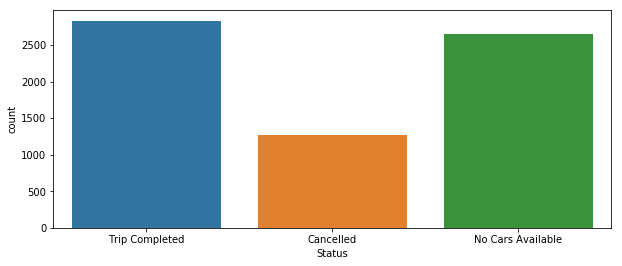

In [11]:
plt.figure(figsize=(10, 4))
sns.countplot(x="Status", data=df)
plt.show()
#plotting the frequencies of status

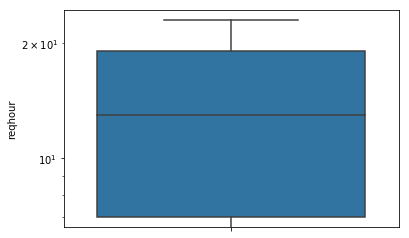

In [12]:
sns.boxplot(y=df['reqhour'])
plt.yscale('log')
plt.show()

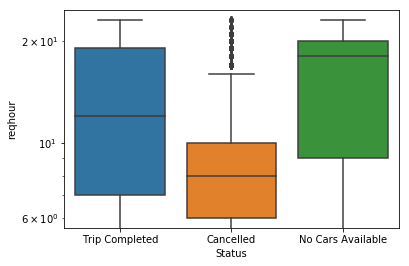

In [13]:
sns.boxplot(x='Status', y='reqhour', data=df)
plt.yscale('log')
plt.show()
#plotting the distribution of hour

In [14]:
df['reqhour']=pd.to_numeric(df['reqhour'])
#converting hour to numeric

In [15]:
df['time_slot'] =np.where(df['reqhour']<5,"pre morning", np.where(df['reqhour'] < 10,"Morning_Rush",np.where(df['reqhour'] < 17,"Day_Time",np.where(df['reqhour'] < 22,"Evening_Rush","Late_Night"))))
#some reference made for analysis
##0-4 pre morning
#5-9 morning rush
#10 am to 4 pm day time
#5 pm to 9 pm evening time
#10 pm to 12 late night

In [16]:
df.head()

,Request id,Pickup point,Driver id,Status,Request date,Drop date,day,reqhour,time_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,Morning_Rush


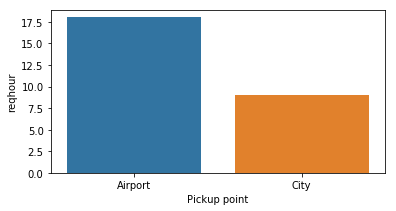

In [17]:
plt.figure(figsize=(6, 3))
sns.barplot(y='reqhour', x="Pickup point", data=df, estimator=np.median)
plt.show()

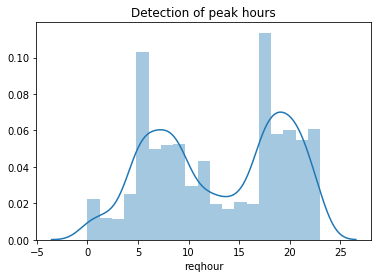

In [18]:
sns.distplot(df['reqhour'])
plt.title('Detection of peak hours')
plt.show()


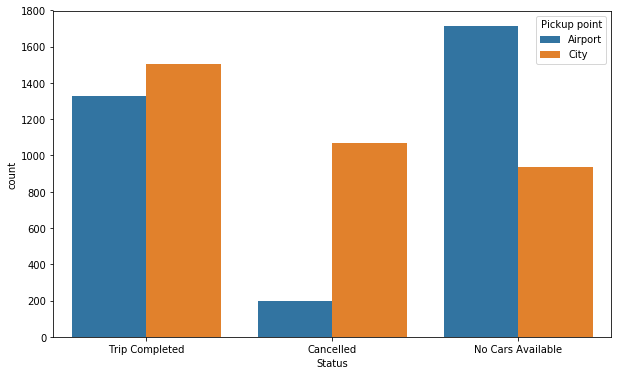

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Status",hue='Pickup point' ,data=df)
plt.show()

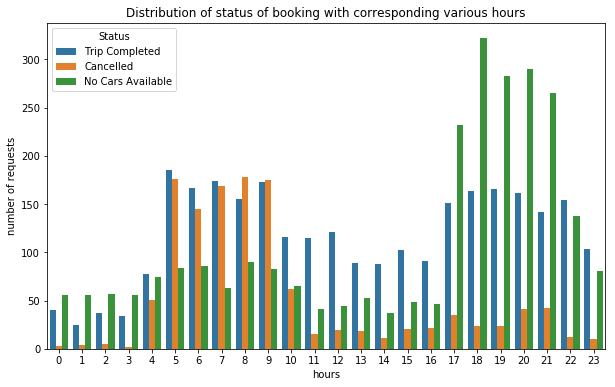

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x="reqhour",hue='Status' ,data=df)
plt.title('Distribution of status of booking with corresponding various hours')
plt.ylabel('number of requests')
plt.xlabel('hours')
plt.show()

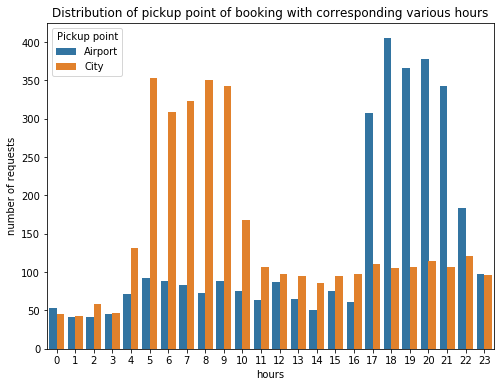

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x="reqhour",hue='Pickup point' ,data=df)
plt.title('Distribution of pickup point of booking with corresponding various hours')
plt.ylabel('number of requests')
plt.xlabel('hours')
plt.show()

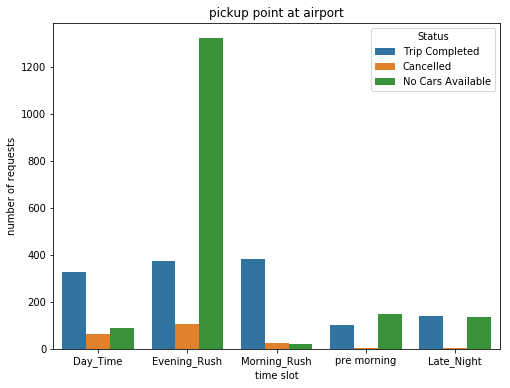

In [22]:
m1=df[df['Pickup point']=='Airport']
plt.figure(figsize=(8, 6))
sns.countplot(x="time_slot",hue='Status' ,data=m1)
plt.title('pickup point at airport')
plt.ylabel('number of requests')
plt.xlabel('time slot')
plt.show()
#most critical problem for uber at airport at evening

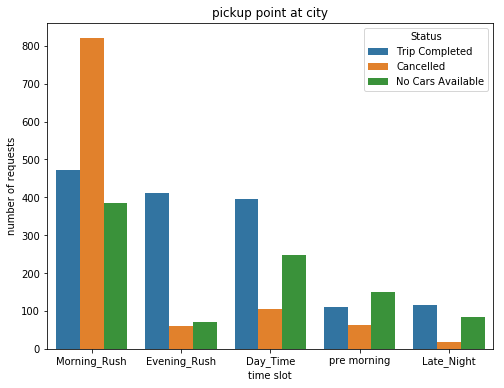

In [23]:
m1=df[df['Pickup point']=='City']
plt.figure(figsize=(8, 6))
sns.countplot(x="time_slot",hue='Status' ,data=m1)
plt.title('pickup point at city')
plt.ylabel('number of requests')
plt.xlabel('time slot')
plt.show()
#most critical problem for uber at city in morning

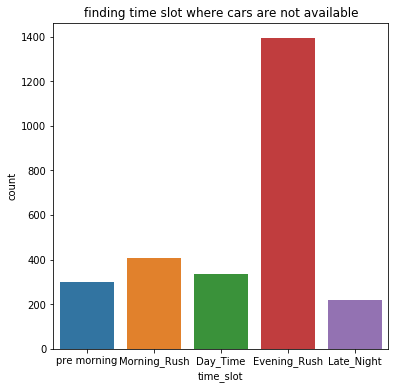

In [24]:
y=df[df['Status']=='No Cars Available']
plt.figure(figsize=(6, 6))
sns.countplot(x="time_slot", data=y)
plt.title('finding time slot where cars are not available')
plt.show()

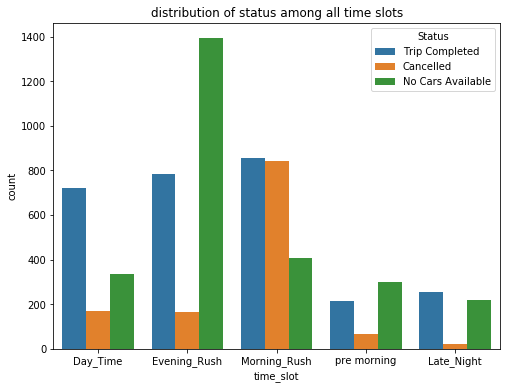

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x="time_slot",hue='Status' ,data=df)
plt.title('distribution of status among all time slots')
plt.show()
#i had found that there is more cancellation rate in morning and no cars available in evening

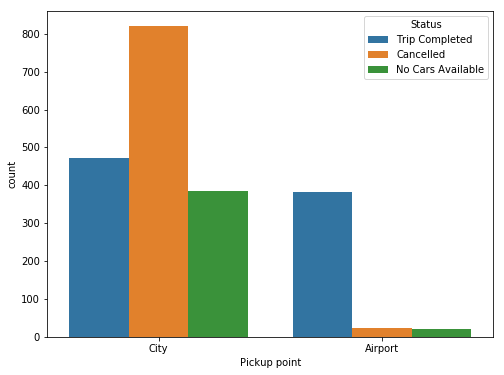

In [26]:
x1=df[df['time_slot']=='Morning_Rush']
plt.figure(figsize=(8, 6))
sns.countplot(x="Pickup point",hue='Status' ,data=x1)
plt.show()
#finding in morning time slot which pickup point have higher cancellation rates and finally found it is city
#there is high demand of cars in early morning and morning hours from city to airport

In [27]:
# in morning the severity of problem by location is mentioned below
z=x1[x1['Status']=='Cancelled']
z=z[z['Pickup point']=='Airport']
z['Request id'].count()

23

In [28]:
z=x1[x1['Status']=='Cancelled']
z=z[z['Pickup point']=='City']
z['Request id'].count()

820

In [29]:
# supply and demand in morning where there are more cancellations is mentioned below
z=x1[x1['Status']=='Trip Completed']
z=z[z['Pickup point']=='City']
z['Request id'].count()
#here comes the supply at city

472

In [30]:
z=x1[x1['Pickup point']=='City']
z['Request id'].count()
#here needs the demand in city

1677

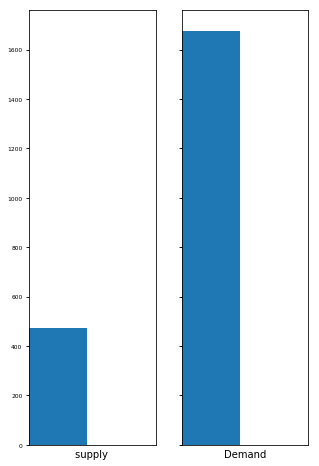

In [113]:
z=x1[x1['Status']=='Trip Completed']
z=z[z['Pickup point']=='City']

k=x1[x1['Pickup point']=='City']

plt.figure(figsize=(5, 8))


ax1 =plt.subplot(1, 2, 1)
z['Pickup point'].value_counts().plot(kind='bar')
plt.xlabel('supply ')
plt.setp(ax1.get_yticklabels(), fontsize=6)


ax2=plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
k['Pickup point'].value_counts().plot(kind='bar')
plt.xlabel('Demand')
plt.xlim(0.04, 0.5)

fig = plt.gcf()

#supply demand gap in city

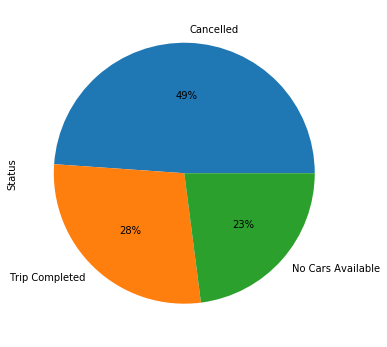

In [39]:
z=x1[x1['Pickup point']=='City']
plt.figure(figsize=(8, 6))
z['Status'].value_counts().plot(kind='pie',autopct='%1.0f%%')
#high cancellation is observed at city in the morning time

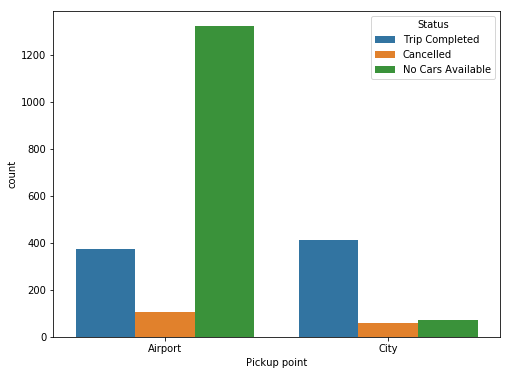

In [32]:
y1=df[df['time_slot']=='Evening_Rush']
plt.figure(figsize=(8, 6))
sns.countplot(x="Pickup point",hue='Status' ,data=y1)
plt.show()

#In evening time there will be huge need of cars from airport to city

In [33]:
z=y1[y1['Status']=='No Cars Available']
z=z[z['Pickup point']=='City']
z['Request id'].count()
#non availability of cars at city in evening

71

In [34]:
z=y1[y1['Status']=='No Cars Available']
z=z[z['Pickup point']=='Airport']
z['Request id'].count()
#non availability of cars at Airport in evening

1321

In [106]:
z=y1[y1['Status']=='Trip Completed']
z=z[z['Pickup point']=='Airport']
z['Request id'].count()
#supply at the airport

373

In [108]:
k=y1[y1['Pickup point']=='Airport']
k['Request id'].count()
#demand at the airport

1800

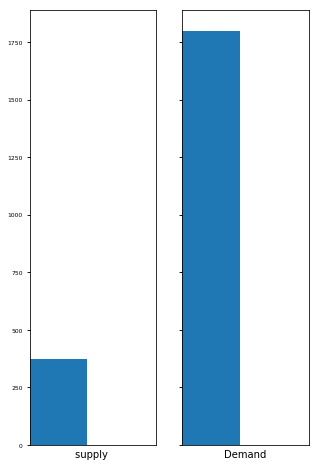

In [112]:
z=y1[y1['Status']=='Trip Completed']
z=z[z['Pickup point']=='Airport']

k=y1[y1['Pickup point']=='Airport']

plt.figure(figsize=(5, 8))


ax1 =plt.subplot(1, 2, 1)
z['Pickup point'].value_counts().plot(kind='bar')
plt.xlabel('supply ')
plt.setp(ax1.get_yticklabels(), fontsize=6)


ax2=plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
k['Pickup point'].value_counts().plot(kind='bar')
plt.xlabel('Demand')
plt.xlim(0.04, 0.5)

fig = plt.gcf()

#supply demand gap at airport

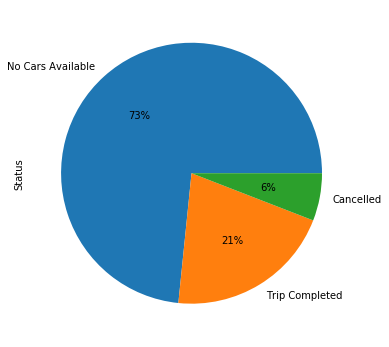

In [41]:
z=y1[y1['Pickup point']=='Airport']
plt.figure(figsize=(8, 6))
z['Status'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()
#no cars available at airport in evening time